## Linear regression and Regularization:

1. Predict the “Overall” (target attribute: “overall”) rating of the players using Linear regression report the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score.

2. Compare the performance of linear regression, Ridge regression, and Lasso regression models. Perform the hyperparameters tuning and observe how they affect the model’s bias-variance trade-off, investigate the impact of the Lasso regularisation parameter on this feature selection process.

Note: Please carry out the necessary data preprocessing and test-train split as 20: 80%.

The use of the scikit-learn library is allowed for this question. For (b), include necessary
metrics like MSE, MAE, R2 Score for performance analysis and necessary plots (Ex:
Scatter plots/line plots) for hyperparameters tuning.

In [1]:
import pandas as pd
import numpy as np
import datapurifier as dp
from datapurifier import Mleda, MlReport

In [2]:
df = pd.read_csv("football.csv")

In [3]:
report = MlReport(df)
report


Sample of Dataframe:


,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
7206,240473,T. Wilson,61,72,700000.0,500.0,21,172,66,305.0,Bohemian FC,Rep. Ireland Airtricity League,1.0,19.0,NaN,Left,2,2,1,High/Medium,Lean (170-185),1200000.0,NaN,NaN,70.0,42.0,55.0,59.0,56.0,52.0,61,28,46,57,31,58,67,70,45,56,72,68,71,53,76,56,79,65,41,57,55,53,57,47,46,52,58,59,57,7,7,13,15,6,NaN,0
7535,262974,S. Messeguem,59,71,550000.0,1000.0,20,185,79,506.0,FC Erzgebirge Aue,German 2. Bundesliga,2.0,18.0,NaN,Right,3,2,1,High/High,Normal (185+),963000.0,NaN,Flair,66.0,45.0,56.0,59.0,57.0,66.0,53,43,51,60,34,60,42,38,58,64,71,61,51,56,54,56,58,67,67,40,64,60,58,57,43,50,53,60,56,11,6,8,9,14,NaN,1
3904,202223,J. Meram,68,68,950000.0,4000.0,32,185,75,111065.0,Real Salt Lake,USA Major League Soccer,1.0,9.0,NaN,Right,4,3,1,Medium/Medium,Normal (185+),1400000.0,NaN,"Finesse Shot, Technical Dribbler (AI)",69.0,67.0,65.0,71.0,58.0,68.0,64,66,59,68,64,72,73,65,56,68,72,66,78,69,64,73,64,68,68,67,67,61,67,66,64,68,57,57,57,13,8,8,13,6,NaN,1
190,210935,D. Berardi,82,82,33500000.0,51000.0,26,183,72,111974.0,U.S. Sassuolo Calcio,Italian Serie A,1.0,25.0,11.0,Left,3,4,2,Medium/Medium,Lean (170-185),57000000.0,#Acrobat,"Flair, Long Shot Taker (AI), Team Player, Tech...",79.0,80.0,81.0,85.0,36.0,69.0,77,80,62,85,78,83,78,75,79,88,81,77,90,77,82,83,65,70,63,80,85,26,79,81,76,78,42,30,30,5,6,5,5,6,NaN,1
2069,205215,Igor Rossi,72,72,1500000.0,11000.0,32,189,80,112389.0,Al Faisaly,Saudi Abdul L. Jameel League,1.0,3.0,NaN,Left,2,2,1,Medium/High,Normal (185+),2500000.0,NaN,"Long Passer (AI), Power Header",41.0,30.0,54.0,53.0,72.0,83.0,44,25,78,63,27,51,43,32,61,62,45,38,33,68,36,43,82,86,85,26,73,68,34,51,46,63,73,71,72,16,13,15,15,9,NaN,0
3084,230249,Marlinito Dias,70,70,1600000.0,7000.0,25,189,84,111052.0,Fortaleza,Campeonato Brasileiro Série A,1.0,33.0,NaN,Right,3,2,1,Medium/Medium,Normal (185+),3000000.0,#Strength,"Solid Player, Power Header",56.0,44.0,64.0,57.0,66.0,71.0,49,36,77,76,43,45,31,54,70,75,53,58,45,78,40,58,45,53,86,44,62,68,69,64,45,73,70,62,51,11,16,9,11,8,NaN,0
6560,223902,T. Pett,63,63,475000.0,3000.0,29,173,70,1928.0,Port Vale,English League Two,4.0,23.0,NaN,Right,4,3,1,Medium/Medium,Normal (170-185),831000.0,#Acrobat,"Playmaker (AI), Technical Dribbler (AI)",65.0,56.0,62.0,68.0,54.0,53.0,60,55,37,64,51,65,59,56,63,64,68,63,90,63,85,57,77,73,47,59,35,59,58,63,56,65,51,59,52,12,11,16,15,9,NaN,1
5679,231720,Q. Braat,65,70,875000.0,1000.0,23,194,90,1813.0,Chamois Niortais Football Club,French Ligue 2,2.0,30.0,NaN,Right,2,1,1,Medium/Medium,Normal (185+),1600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7,14,30,9,6,11,13,21,14,22,31,32,47,29,48,30,18,60,5,27,11,9,29,14,55,9,14,11,65,66,64,66,67,26.0,0
5808,244277,K. Watts,65,76,1500000.0,6000.0,21,192,75,1917.0,Wigan Athletic,English League One,3.0,2.0,NaN,Left,4,2,1,Medium/Medium,Lean (185+),NaN,NaN,Long Passer (AI),59.0,48.0,54.0,57.0,63.0,74.0,44,45,63,65,38,56,44,36,60,59,66,54,53,59,55,59,70,69,79,43,67,62,46,48,53,56,63,64,62,11,11,13,10

Shape of DataFrame:  (7772, 66)

Categorical columns: ['short_name', 'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type', 'player_tags', 'player_traits']

Numerical columns: ['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number', 'nation_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_

,column,unique_count,unique_percent
0,sofifa_id,7772,100.000000
1,short_name,7524,96.809058
2,overall,46,0.591868
3,potential,42,0.540401
4,value_eur,244,3.139475
...,...,...,...
61,goalkeeping_kicking,71,0.913536
62,goalkeeping_positioning,67,0.862069
63,goalkeeping_reflexes,59,0.759135
64,goalkeeping_speed,51,0.656202


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
count,7772.000000,7772.000000,7772.000000,7.706000e+03,7711.000000,7772.000000,7772.000000,7772.000000,7711.000000,7711.000000,7711.000000,533.000000,7772.000000,7772.000000,7772.000000,7.306000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,709.000000,7772.000000
mean,223576.030108,68.864642,72.068708,4.356581e+06,12104.526002,26.784483,181.484174,75.547735,51470.375178,1.360913,16.528466,12.067542,2.998713,2.457669,1.147967,8.235466e+06,68.607107,54.401954,60.148096,64.637689,55.528529,68.312473,52.968863,48.333248,55.050566,62.389475,44.871462,58.453680,50.493181,45.413278,56.859238,61.838008,65.953680,66.069609,65.342126,65.050051,64.889089,60.591611,67.217190,67.906330,68.199434,49.949949,59.799151,51.452265,53.215260,57.015440,49.969506,61.966804,51.276248,52.237133,49.731987,15.892306,15.652728,15.534869,15.800051,15.994339,40.332863,0.456253
std,26710.971306,5.951090,6.075526,1.047773e+07,24717.270914,4.318905,6.861546,7.046195,54493.246508,0.760792,15.471724,6.937905,0.685530,0.784704,0.471261,2.050041e+07,11.701207,14.351594,9.579853,9.363637,15.643798,8.515295,17.849182,19.583571,16.894676,13.281671,17.892006,17.912354,18.395100,17.871294,14.142718,15.414060,14.505087,14.401192,14.484987,7.938847,14.222438,13.066384,12.170355,15.077861,11.788985,19.311624,16.262309,20.107885,19.310655,13.574779,15.680751,10.884304,19.652449,20.913706,20.637531,17.452831,16.749303,16.299055,17.172838,17.858210,10.211288,0.498115
min,41.000000,48.000000,53.000000,2.500000e+04,500.000000,17.000000,156.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,207560.750000,65.000000,68.000000,7.250000e+05,2000.000000,24.000000,177.000000,70.000000,503.000000,1.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.200000e+06,62.000000,44.000000,54.000000,59.000000,42.500000,63.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.750000,32.000000,50.000000,58.000000,58.000000,59.000000,58.000000,60.000000,57.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,43.000000,48.000000,40.000000,56.000000,35.000000,34.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,0.000000
50%,2


Null Information of Dataframe: 


There are total 18 columns having null values out of 66 columns in dataframe



,column_name,null_rows,null_percentage
0,nation_jersey_number,7239,93.142048
1,goalkeeping_speed,7063,90.877509
2,player_tags,6900,88.780237
3,player_traits,2901,37.326300
4,pace,709,9.122491
5,shooting,709,9.122491
6,passing,709,9.122491
7,dribbling,709,9.122491
8,defending,709,9.122491
9,physic,709,9.122491


### Feature Scaling

In [4]:
### removing categorical columns, more null values columns, unrelated columns (ID, ...)

required_columns = ["overall", 'potential', 'value_eur',
        'age', 'height_cm', 'weight_kg',
       'release_clause_eur', 'pace', 'shooting', 'passing',
        'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'contribution_type']
len(required_columns)

48

In [5]:
df1 = df[required_columns].copy()
MlReport(df1)


Sample of Dataframe:


,overall,potential,value_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,contribution_type
1277,75,77,7000000.0,25,176,69,14500000.0,91.0,72.0,67.0,73.0,50.0,79.0,70,71,74,71,68,73,73,39,65,70,89,92,82,75,78,79,82,81,77,68,80,47,74,66,62,66,41,52,51,6,12,13,13,6,1
3661,69,77,3000000.0,22,175,76,NaN,76.0,42.0,62.0,63.0,63.0,74.0,69,41,61,63,32,61,52,43,62,64,77,75,72,64,66,40,86,78,75,44,65,64,51,58,45,60,61,65,64,10,14,13,6,7,0
3949,68,69,1300000.0,27,188,77,1800000.0,76.0,59.0,64.0,64.0,61.0,71.0,66,56,44,63,45,62,66,66,61,65,73,78,70,61,68,72,68,82,70,60,60,63,60,63,51,62,62,65,62,11,7,12,12,15,0
4083,68,73,1500000.0,24,184,69,2900000.0,NaN,NaN,NaN,NaN,NaN,NaN,20,15,21,29,19,20,19,12,26,27,41,45,33,67,63,50,55,25,51,16,20,20,11,23,25,46,11,19,17,68,64,67,65,69,0
2552,71,73,2300000.0,26,165,65,4000000.0,69.0,58.0,72.0,77.0,55.0,68.0,71,53,38,72,53,75,69,64,73,75,73,66,84,73,91,67,82,74,58,61,82,65,57,75,56,73,51,57,54,13,10,16,14,10,1
921,76,77,7000000.0,29,187,92,11000000.0,60.0,33.0,47.0,58.0,75.0,86.0,40,28,80,58,27,57,36,26,48,63,58,61,53,67,33,52,61,76,92,27,91,81,37,41,26,59,72,75,71,13,10,10,14,11,0
2716,71,71,1600000.0,30,178,73,2100000.0,78.0,61.0,68.0,68.0,66.0,72.0,69,56,65,68,68,65,67,70,64,68,73,82,81,69,66,71,67,79,71,66,66,65,64,69,34,68,69,66,64,11,8,5,15,9,0
294,81,88,52500000.0,21,170,68,99800000.0,94.0,67.0,73.0,85.0,41.0,53.0,75,73,28,78,63,87,66,41,70,82,96,92,92,77,93,73,62,70,44,54,51,48,77,76,42,75,46,35,46,8,9,8,8,14,1
7051,62,75,950000.0,21,181,78,1800000.0,71.0,55.0,56.0,61.0,56.0,68.0,58,56,61,61,48,60,48,47,57,61,70,71,69,53,64,60,64,72,67,52,67,55,52,51,48,57,54,58,55,13,14,14,5,9,0
1720,73,74,3300000.0,26,182,73,5900000.0,86.0,42.0,62.0,69.0,66.0,67.0,75,39,49,70,41,68,39,32,63,71,85,86,73,67,70,49,80,72,65,38,62,68,56,48,39,58,63,72,71,10,13,10,11,12,0


Shape of DataFrame:  (7772, 48)

Categorical columns: []

Numerical columns: ['overall', 'potential', 'value_eur', 'age', 'height_cm', 'weight_kg', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeepin

,column,unique_count,unique_percent
0,overall,46,0.591868
1,potential,42,0.540401
2,value_eur,244,3.139475
3,age,27,0.347401
4,height_cm,46,0.591868
5,weight_kg,49,0.630468
6,release_clause_eur,910,11.708698
7,pace,69,0.887802
8,shooting,76,0.977869
9,passing,66,0.849202


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,overall,potential,value_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,contribution_type
count,7772.000000,7772.000000,7.706000e+03,7772.000000,7772.000000,7772.000000,7.306000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000
mean,68.864642,72.068708,4.356581e+06,26.784483,181.484174,75.547735,8.235466e+06,68.607107,54.401954,60.148096,64.637689,55.528529,68.312473,52.968863,48.333248,55.050566,62.389475,44.871462,58.453680,50.493181,45.413278,56.859238,61.838008,65.953680,66.069609,65.342126,65.050051,64.889089,60.591611,67.217190,67.906330,68.199434,49.949949,59.799151,51.452265,53.215260,57.015440,49.969506,61.966804,51.276248,52.237133,49.731987,15.892306,15.652728,15.534869,15.800051,15.994339,0.456253
std,5.951090,6.075526,1.047773e+07,4.318905,6.861546,7.046195,2.050041e+07,11.701207,14.351594,9.579853,9.363637,15.643798,8.515295,17.849182,19.583571,16.894676,13.281671,17.892006,17.912354,18.395100,17.871294,14.142718,15.414060,14.505087,14.401192,14.484987,7.938847,14.222438,13.066384,12.170355,15.077861,11.788985,19.311624,16.262309,20.107885,19.310655,13.574779,15.680751,10.884304,19.652449,20.913706,20.637531,17.452831,16.749303,16.299055,17.172838,17.858210,0.498115
min,48.000000,53.000000,2.500000e+04,17.000000,156.000000,53.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,65.000000,68.000000,7.250000e+05,24.000000,177.000000,70.000000,1.200000e+06,62.000000,44.000000,54.000000,59.000000,42.500000,63.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.750000,32.000000,50.000000,58.000000,58.000000,59.000000,58.000000,60.000000,57.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,43.000000,48.000000,40.000000,56.000000,35.000000,34.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000
50%,68.000000,72.000000,1.400000e+06,27.000000,182.000000,75.000000,2.300000e+06,70.000000,57.000000,61.000000,65.000000,61.000000,69.000000,58.000000,52.000000,58.000000,65.000000,46.000000,63.000000,53.000000,45.000000,60.000000,65.000000,68.000000,69.000000,67.000000,65.000000,67.000000,62.000000,69.000000,71.000000,69.000000,55.000000,63.000000,59.000000,59.000000,59.000000,50.000000,63.000000,58.000000,61.000000,58.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.000000
75%,73.000000,76.000000,3.000000e+06,30.000000,186.000000,80.000000,5.500000e+06,77.000000,65.000000,67.000000,71.000000,67.000000,74.000000,66.000000,64.000000,67.000000,70.000000,59.0000


Null Information of Dataframe: 


There are total 8 columns having null values out of 48 columns in dataframe



,column_name,null_rows,null_percentage
0,pace,709,9.122491
1,shooting,709,9.122491
2,passing,709,9.122491
3,dribbling,709,9.122491
4,defending,709,9.122491
5,physic,709,9.122491
6,release_clause_eur,466,5.995883
7,value_eur,66,0.849202


In [6]:
## Checking for outliers using IQR (Interquartile Range)

outlier_df = df1.copy()
outliers = {}
for column in required_columns:
    Q1 = outlier_df[column].quantile(0.25)
    Q3 = outlier_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier = ((outlier_df[column] < (Q1 - 1.5 * IQR)) | (outlier_df[column] > (Q3 + 1.5 * IQR))) # this returns true or false
    outliers[column] = outlier

cnt = 0
for k, v in outliers.items():
    s = sum(v)
    if s != 0:
        print(k," : ", s)
        cnt+=1
print("\n\nTotal we have outliers in ", cnt," columns out of ", len(required_columns), " columns")

overall  :  72
potential  :  70
value_eur  :  1051
age  :  12
height_cm  :  38
weight_kg  :  26
release_clause_eur  :  987
pace  :  155
passing  :  28
dribbling  :  89
physic  :  102
attacking_crossing  :  11
attacking_heading_accuracy  :  629
attacking_short_passing  :  666
skill_dribbling  :  742
skill_long_passing  :  361
skill_ball_control  :  748
movement_acceleration  :  157
movement_sprint_speed  :  267
movement_agility  :  232
movement_reactions  :  99
movement_balance  :  96
power_shot_power  :  14
power_jumping  :  183
power_stamina  :  702
power_strength  :  140
mentality_aggression  :  97
mentality_positioning  :  99
mentality_vision  :  33
mentality_composure  :  221
goalkeeping_diving  :  712
goalkeeping_handling  :  712
goalkeeping_kicking  :  715
goalkeeping_positioning  :  712
goalkeeping_reflexes  :  712


Total we have outliers in  35  columns out of  48  columns


In [7]:
## Correlation

cor_matrix = df1.corr().abs() 
# print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) 
# print(upper_tri)
corr_threshold = 0.95
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)] 
print("Dropping Columns: \n")
print(columns_to_drop)
df2 = df1.drop(columns_to_drop, axis=1) 
print("\nTotal Columns After dropping highly correlated columns: ", len(df2.columns))
print("\n")
print(df2.columns)

Dropping Columns: 

['release_clause_eur', 'attacking_finishing', 'skill_dribbling', 'movement_acceleration', 'movement_sprint_speed', 'mentality_interceptions', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

Total Columns After dropping highly correlated columns:  35


Index(['overall', 'potential', 'value_eur', 'age', 'height_cm', 'weight_kg',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_positioning',
       'menta

In [8]:
## PCA

In [9]:
## dropping rows

# data = df2.dropna()
data = df2.fillna(df2.median())
data.shape

(7772, 35)

### Splitting the dataset and Training the model

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['overall'])
y = data['overall']

# 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6217, 34)
Shape of y_train: (6217,)
Shape of X_test: (1555, 34)
Shape of y_test: (1555,)


### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)
y_pred.shape

(1555,)

In [13]:
print("Real Values: ", y_test.to_list()[:10])
print("Predicted Values: ", y_pred[:10])

Real Values:  [67, 62, 75, 69, 67, 74, 67, 65, 72, 75]
Predicted Values:  [69.10348525 64.02127677 76.93343902 69.08713737 65.86143422 73.95477269
 66.23881956 66.60186493 71.89438535 75.74932023]


### Evaluating Linear Regression Model

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred):
    # Calculating MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Calculating MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculating R2 score
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

In [15]:
evaluate_model(y_test, y_pred)

Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 2.39
R2 Score: 0.93


### Ridge and Lasso Regression

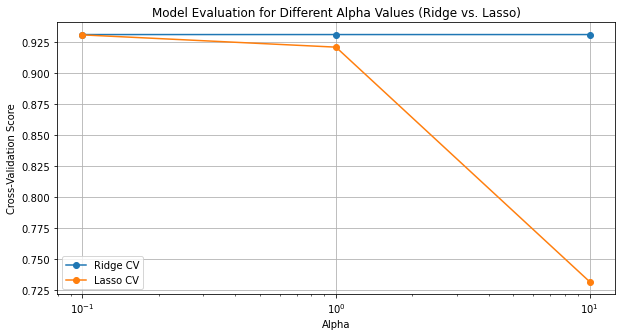

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

alphas = [0.1, 1.0, 10.0]
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge_cv = RidgeCV(alphas=[alpha], cv=10)
    ridge_cv.fit(X_train, y_train)
    ridge_score = np.mean(cross_val_score(ridge_cv, X_train, y_train, cv=10))
    ridge_scores.append(ridge_score)

    lasso_cv = LassoCV(alphas=[alpha], cv=5)
    lasso_cv.fit(X_train, y_train)
    lasso_score = np.mean(cross_val_score(lasso_cv, X_train, y_train, cv=5))
    lasso_scores.append(lasso_score)

# Ploting the cross-validation scores for Ridge and Lasso
plt.figure(figsize=(10, 5))
plt.plot(alphas, ridge_scores, marker='o', label='Ridge CV')
plt.plot(alphas, lasso_scores, marker='o', label='Lasso CV')
plt.title('Model Evaluation for Different Alpha Values (Ridge vs. Lasso)')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validation Score')
plt.xscale('log') 
plt.legend()
plt.grid(True)
plt.show()

### Therefore best alpha value for Ridge regression is 10, and for Lasso it is 0.1

In [17]:
## Retraining Lasso model with best alpha value
lasso_cv = LassoCV(alphas=[0.1], cv=5)
lasso_cv.fit(X_train, y_train)

print("Best Ridge Regression Alpha: ", ridge_cv.alpha_)
print("Best Lasso Regression Alpha: ", lasso_cv.alpha_)

Best Ridge Regression Alpha:  10.0
Best Lasso Regression Alpha:  0.1


### Evaluating Ridge and Lasso Regression

In [18]:
print("Linear Regression: ")
y_pred = lr.predict(X_test)
evaluate_model(y_test, y_pred)

print("\n\nRidge Regression: ")
y_pred = ridge_cv.predict(X_test)
evaluate_model(y_test, y_pred)

print("\n\nLasso Regression: ")
y_pred = lasso_cv.predict(X_test)
evaluate_model(y_test, y_pred)

Linear Regression: 
Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 2.39
R2 Score: 0.93


Ridge Regression: 
Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 2.39
R2 Score: 0.93


Lasso Regression: 
Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 2.38
R2 Score: 0.93


### Since the result of all the three regression models are the same, we can say there is no overfitting

### Trying with Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
evaluate_model(y_test, y_pred)
print("\n\nTherefore it same as previous error, so no need for standard scaling")

Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 2.39
R2 Score: 0.93


Therefore it same as previous error, so no need for standard scaling


### Bias and Variance Tradeoff

In [27]:
from sklearn.linear_model import Lasso
alpha_values= [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
bias_array = []
variance_array= []
coefficients= []
mse_array= []

for i in  alpha_values:
    lassomodel = Lasso(alpha=i)
    lassomodel.fit(X_train, y_train)
    coefficients.append(lassomodel.coef_)
    y_pred = lassomodel.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_array.append(mse)
    bias = (np.mean((y_pred) - (y_test)))
    bias_array.append(bias)
    variance = np.var(y_pred)
    variance_array.append(variance)

print("Bias: ", bias_array)
print("Variance: ", np.log10(variance_array))

Bias:  [-0.033924595180153255, -0.033585229168716785, -0.034484366369641806, -0.057796871416449944, -0.08391003114509529, 0.0720576363697881, 0.07206036268744095]
Variance:  [1.51819341 1.51771537 1.51366207 1.47611923 1.21698237 0.98880853
 0.98878938]


In [28]:
alpha_values

[0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

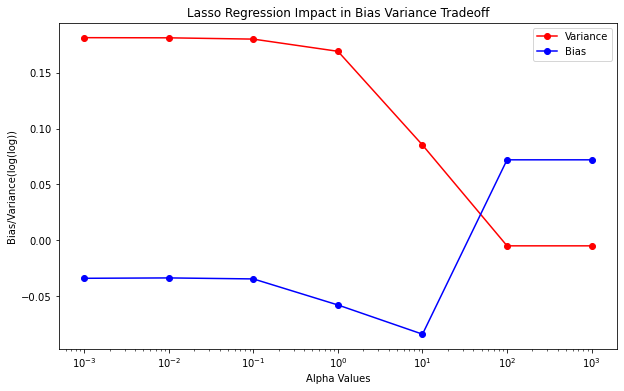

In [34]:
plt.figure(figsize=(10,6))
# plt.plot(alpha_values, variance_array, label="Variance", color="red", marker = 'o')
plt.plot(alpha_values, np.log10(np.log10(variance_array)), label="Variance", color="red", marker = 'o')
plt.plot(alpha_values, bias_array, label="Bias", color="blue", marker = 'o')
plt.xscale('log')
plt.xlabel("Alpha Values")
plt.ylabel("Bias/Variance(log(log))")
plt.title("Lasso Regression Impact in Bias Variance Tradeoff")
# plt.grid()
plt.legend()
plt.show()